In [181]:
# Importing the required libraries.
import sys
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer, RobustScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('python version : {}'.format(sys.version))
print('pandas version : {}'.format(pd.__version__))
print('numpy version : {}'.format(np.__version__))
print('sklearn version : {}'.format(sklearn.__version__))
print('seaborn version : {}'.format(sns.__version__))
print('matplotlib version : {}'.format(matplotlib.__version__))

python version : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
pandas version : 1.3.4
numpy version : 1.20.3
sklearn version : 0.24.2
seaborn version : 0.11.2
matplotlib version : 3.4.3


In [182]:
# Ignoring Unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [183]:
# data reading
data=pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [184]:
#to check any missing value in the data.
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [185]:
# rename the columns which contain spaces in their names and replace the spaces with underscores
data.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
       'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [186]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [187]:
data.cov()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile_acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric_acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual_sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
free_sulfur_dioxide,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698,-0.427907
total_sulfur_dioxide,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298,-4.917237
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
pH,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413


In [188]:
data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


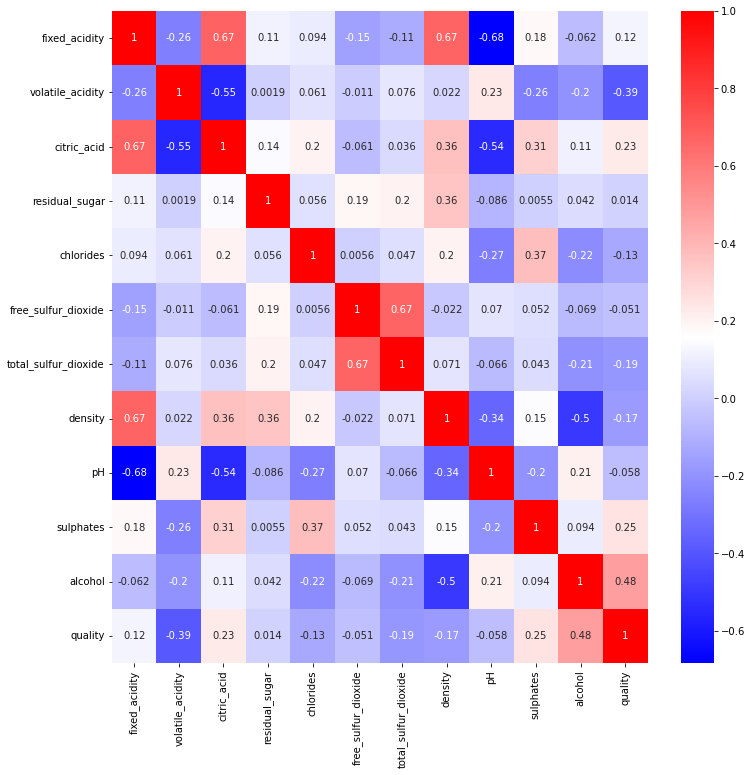

In [189]:
plt.figure(figsize=(12,12))
sns.heatmap(data=data.corr(),annot=True,cmap="bwr")
plt.show()

In [190]:
# show the covariance and the Pearson Correlation Coefficient between each of the 11 characteristics and the quality of the red wine
res = pd.DataFrame([data.cov().iloc[:, -1], data.corr().iloc[:, -1]], index=['covariance', 'correlation'])
res.drop(['quality'], axis=1, inplace=True)
res

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
covariance,0.174424,-0.056476,0.035612,0.015635,-0.004900,-0.427907,-4.917237,-0.000267,-0.007198,0.034413,0.409789
correlation,0.124052,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.185100,-0.174919,-0.057731,0.251397,0.476166


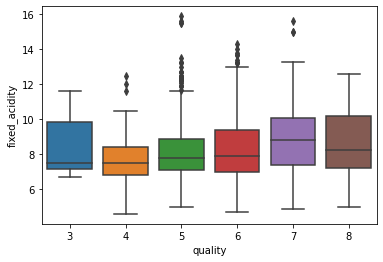

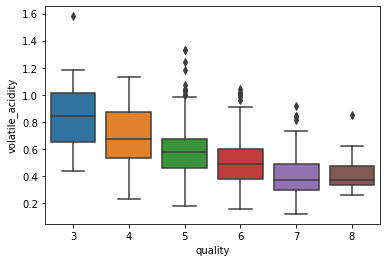

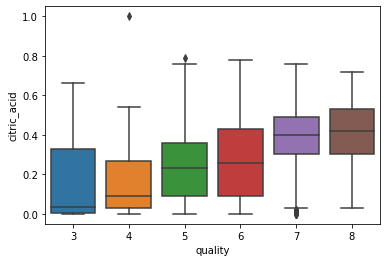

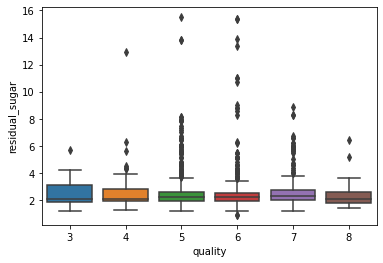

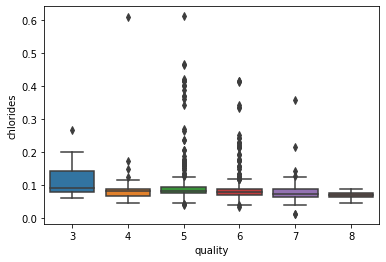

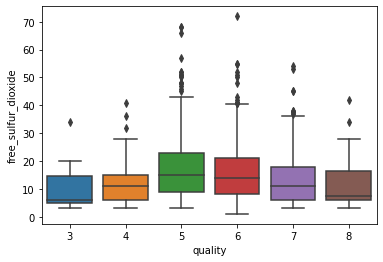

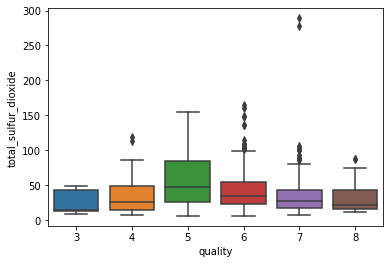

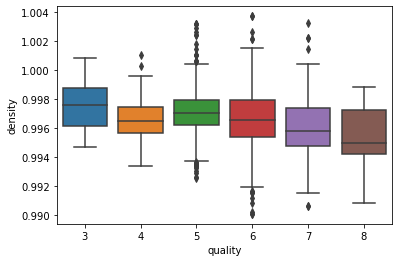

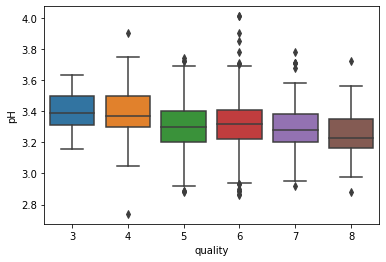

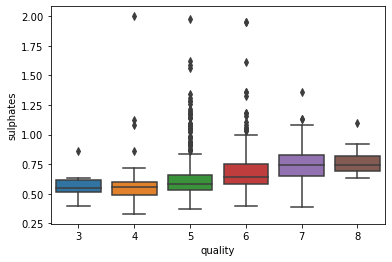

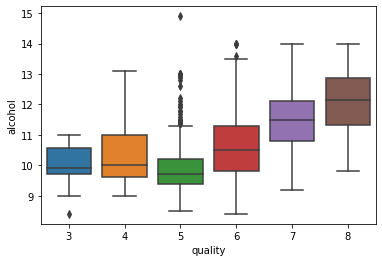

In [191]:
for i in data.columns:
    if i =="quality":
        break
    sns.boxplot("quality",i,data=data)
    plt.show()

In [192]:
# we can find that when quality is rising the value of volatile_acidity will get lower
# when quality rising, the value of citric_acid will get higher
# We can find that there are many outliers in the data, we can remove them during preprocessing to increase the accuracy

In [193]:
# slice the data into features and predict target
X = data.iloc[:, :-1]
y = data['quality']

In [194]:
# It can effectively scale data with outliers. 
# If the data contains outliers, it will be discarded in the scaling through Robust.
sc=RobustScaler()  
X=sc.fit_transform(X)
X[:5]

array([[-0.23809524,  0.72      , -0.78787879, -0.42857143, -0.15      ,
        -0.21428571, -0.1       ,  0.46979866,  1.05263158, -0.33333333,
        -0.5       ],
       [-0.04761905,  1.44      , -0.78787879,  0.57142857,  0.95      ,
         0.78571429,  0.725     ,  0.02237136, -0.57894737,  0.33333333,
        -0.25      ],
       [-0.04761905,  0.96      , -0.66666667,  0.14285714,  0.65      ,
         0.07142857,  0.4       ,  0.11185682, -0.26315789,  0.16666667,
        -0.25      ],
       [ 1.57142857, -0.96      ,  0.90909091, -0.42857143, -0.2       ,
         0.21428571,  0.55      ,  0.55928412, -0.78947368, -0.22222222,
        -0.25      ],
       [-0.23809524,  0.72      , -0.78787879, -0.42857143, -0.15      ,
        -0.21428571, -0.1       ,  0.46979866,  1.05263158, -0.33333333,
        -0.5       ]])

In [195]:
# split the data into train and test
train_x,test_x,train_y,test_y = train_test_split(data, y, test_size=0.2,
                                                random_state=1)
print("shape of train input data:",train_x.shape,"\nshape of train output data",train_y.shape,

      "\nshape of test input data ",test_x.shape,"\nshape of test output data",test_y.shape)

shape of train input data: (1279, 12) 
shape of train output data (1279,) 
shape of test input data  (320, 12) 
shape of test output data (320,)


In [196]:
# train the data
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression()

In [197]:
# get the predict result
pred=model.predict(test_x)
pred[:5]

array([5, 6, 6, 6, 6], dtype=int64)

In [198]:
# print the accuracy
print("Accuracy Score:",accuracy_score(pred,test_y))
print("classification Report:\n",classification_report(pred,test_y))
print("confusion Matrix:\n",confusion_matrix(pred,test_y))

Accuracy Score: 0.921875
classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.99      0.91      0.95       153
           6       0.99      0.94      0.97       141
           7       0.77      0.88      0.82        26
           8       0.00      0.00      0.00         0

    accuracy                           0.92       320
   macro avg       0.46      0.46      0.46       320
weighted avg       0.97      0.92      0.95       320

confusion Matrix:
 [[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  1  13 139   0   0   0]
 [  0   0   1 133   7   0]
 [  0   0   0   1  23   2]
 [  0   0   0   0   0   0]]
